# Analisis energias: train y test
En este notebook se desea analizar la salidas de los archivos energies.train y energies.test para poder realizar una estadistica.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('default')
sns.set_style('whitegrid')

# Carga de datos

In [2]:
Title_ini = 'NN Inicial'
Title_15 = 'NN 15'
NN15_path = 'C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/NNs/nuevas_redes/NN15/50k/'
NNini_path = 'C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/NNs/cont_redes_anteriores/NNini/'

NNini = {}
NNini['train_full'] = pd.read_csv(NNini_path+'energies.train',delim_whitespace=True, skiprows= 1, header = None)
NNini['test_full']  = pd.read_csv(NNini_path+'energies.test',delim_whitespace=True, skiprows= 1, header = None)

NN15 = {}
NN15['train_full']  = pd.read_csv(NN15_path+'energies.train',delim_whitespace=True, skiprows= 1, header = None)
NN15['test_full']   = pd.read_csv(NN15_path+'energies.test',delim_whitespace=True, skiprows= 1, header = None)

NN15['test_full'] 

,0,1,2,3,4,5,6,7,8,9,10
0,-155.4337,-155.4426,56,-2.775602,-2.775760,0.000158,0.000886,51,4,1,DB/NN_NICO/01405.xsf
1,-154.9442,-154.9170,56,-2.766860,-2.766375,-0.000485,-0.002722,51,4,1,DB/NN_NICO/02405.xsf
2,-155.1321,-155.1358,56,-2.770215,-2.770283,0.000067,0.000378,51,4,1,DB/NN_NICO/05399.xsf
3,-154.1776,-154.1837,56,-2.753172,-2.753280,0.000108,0.000607,51,4,1,DB/NN5/13837.xsf
4,-155.1330,-155.1402,56,-2.770232,-2.770361,0.000129,0.000723,51,4,1,DB/NN10/19488.xsf
...,...,...,...,...,...,...,...,...,...,...,...
1202,-153.4422,-153.4468,56,-2.740040,-2.740121,0.000081,0.000453,51,4,1,DB/NN10/16504.xsf
1203,-154.8489,-154.8637,56,-2.765160,-2.765423,0.000264,0.001479,51,4,1,DB/NN10/17534.xsf
1204,-155.1453,-155.1623,56,-2.770451,-2.770755,0.000304,0.001705,51,4,1,DB/NN10/19715.xsf
1205,-155.5836,-155.5800,56,-2.778279,-2.778214,-0.000064,-0.000361,51,4,1,DB/NN15/21383.xsf


In [3]:
E_ref_dft = -155.82
E_ref_ini = -155.819905064064   
E_ref_15  = -155.846302046530

# Proceso de datos

## NNini

In [4]:
NNini['train'] = NNini['train_full'][[0,1,10]]
NNini['train'].columns = ['E_dft', 'E_ann', 'xsf-files']

NNini['test'] = NNini['test_full'][[0,1,10]]
NNini['test'].columns = ['E_dft', 'E_ann', 'xsf-files']

NNini['E'] = pd.concat([NNini['test'] , NNini['train']], join = 'outer')#.set_index('xsf-files').sort_index()
# #E_test = E_test.set_index('xsf-files').sort_index()

NNini['E']['E_diff'] = np.abs(NNini['E']['E_dft'] - NNini['E']['E_ann'])
NNini['E']['origin'] = NNini['E']['xsf-files'].replace('DB/','')
#NNini['E'][NNini['E'].duplicated()].E_diff.head()    #21362

NNini['E']['origin'] = NNini['E']['xsf-files'].str.extract(r'/(\w+)/(\d+).xsf', expand=False)[0]
NNini['E']['id'] = NNini['E']['xsf-files'].str.extract(r'/(\w+)/(\d+).xsf', expand=False)[1]
# You can replace 'column_name', 'New_Column_1', and 'New_Column_2' with your actual column names.
NNini['E'].drop('xsf-files', axis=1, inplace=True)
NNini['E'].sort_values(by='id')

,E_dft,E_ann,E_diff,origin,id
77,-155.8215,-155.8179,0.0036,NN_NICO,00001
3223,-155.6498,-155.6510,0.0012,NN_NICO,00002
4117,-155.7430,-155.7354,0.0076,NN_NICO,00003
5010,-155.8051,-155.7979,0.0072,NN_NICO,00005
5890,-155.8198,-155.8149,0.0049,NN_NICO,00007
...,...,...,...,...,...
1611,-156.1095,-156.1150,0.0055,NN_NICO,12225
1690,-156.1052,-156.0944,0.0108,NN_NICO,12226
1768,-156.0671,-156.0658,0.0013,NN_NICO,12227
1850,-155.9736,-155.9827,0.0091,NN_NICO,12228


In [5]:
NN15['train'] = NN15['train_full'][[0,1,10]]
NN15['train'].columns = ['E_dft', 'E_ann', 'xsf-files']

NN15['test'] = NN15['test_full'][[0,1,10]]
NN15['test'].columns = ['E_dft', 'E_ann', 'xsf-files']

NN15['E'] = pd.concat([NN15['test'] , NN15['train']], join = 'outer')#.set_index('xsf-files').sort_index()
# #E_test = E_test.set_index('xsf-files').sort_index()

NN15['E']['E_diff'] = np.abs(NN15['E']['E_dft'] - NN15['E']['E_ann'])
NN15['E']['origin'] = NN15['E']['xsf-files'].replace('DB/','')
#NNini['E'][NNini['E'].duplicated()].E_diff.head()    #21362

NN15['E']['origin'] = NN15['E']['xsf-files'].str.extract(r'/(\w+)/(\d+).xsf', expand=False)[0]
NN15['E']['id'] = NN15['E']['xsf-files'].str.extract(r'/(\w+)/(\d+).xsf', expand=False)[1]
# You can replace 'column_name', 'New_Column_1', and 'New_Column_2' with your actual column names.
NN15['E'].drop('xsf-files', axis=1, inplace=True)
NN15['E'].sort_values(by='id')

,E_dft,E_ann,E_diff,origin,id
179,-155.8215,-155.8293,0.0078,NN_NICO,00001
376,-155.6498,-155.6561,0.0063,NN_NICO,00002
9141,-155.7430,-155.7587,0.0157,NN_NICO,00003
569,-155.8051,-155.8123,0.0072,NN_NICO,00005
13090,-155.8198,-155.8244,0.0046,NN_NICO,00007
...,...,...,...,...,...
22601,-154.0607,-154.1420,0.0813,NN15,25736
22779,-154.1418,-154.1514,0.0096,NN15,25737
22955,-154.4952,-154.4568,0.0384,NN15,25738
716,-154.4595,-154.4979,0.0384,NN15,25739


In [6]:
NN15['E']

,E_dft,E_ann,E_diff,origin,id
0,-155.4337,-155.4426,0.0089,NN_NICO,01405
1,-154.9442,-154.9170,0.0272,NN_NICO,02405
2,-155.1321,-155.1358,0.0037,NN_NICO,05399
3,-154.1776,-154.1837,0.0061,NN5,13837
4,-155.1330,-155.1402,0.0072,NN10,19488
...,...,...,...,...,...
22951,-153.4226,-153.4724,0.0498,NN15,25225
22952,-154.5724,-154.4902,0.0822,NN15,25354
22953,-154.2715,-154.3795,0.1080,NN15,25482
22954,-154.2404,-154.2085,0.0319,NN15,25610


# Analisis de datos (viejo)

In [7]:
x = np.linspace(-156.5, -145,300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


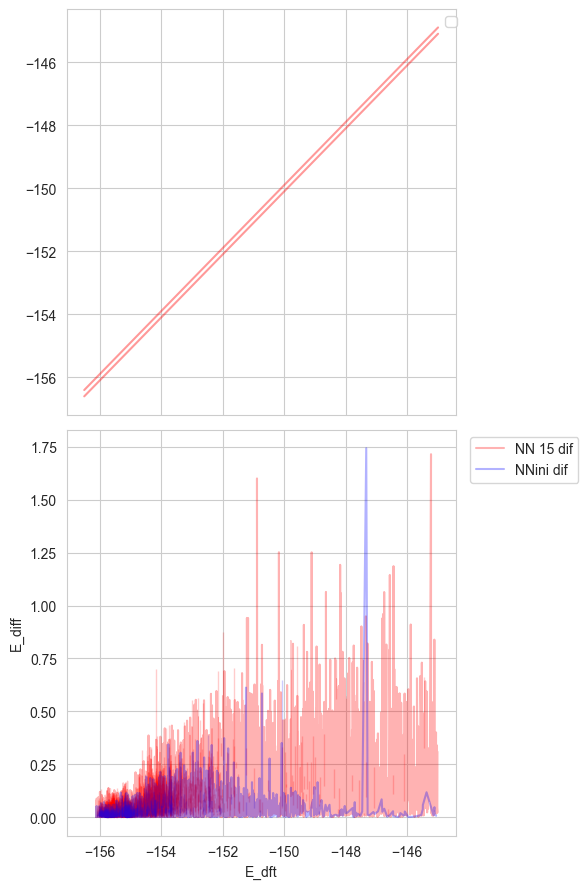

In [8]:
fig,ax = plt.subplots(2,1, figsize=(6,9), sharex=True) 
sns.lineplot(data = NN15['E'].query('E_dft < -145') ,  x='E_dft', y='E_diff',  alpha=0.3,color='red', ax=ax[1], label='NN 15 dif')
ax[0].plot(x,x+0.1, color= 'red', alpha = 0.4)
ax[0].plot(x,x-0.1, color= 'red', alpha = 0.4)
sns.lineplot(data = NNini['E'].query('E_dft < -145'),  x='E_dft', y='E_diff', alpha=0.3,color='blue', ax=ax[1], label='NNini dif')
# sns.scatterplot(data=NN15['E'].query('E_dft < -145') , x='E_dft', y='E_ann', alpha = 0.6, s = 5, color='orange', ax=ax[0] , label='NN 15')
# sns.scatterplot(data=NNini['E'].query('E_dft < -145'), x='E_dft', y='E_ann', alpha = 0.6, s = 5, color='cyan'  , ax=ax[0] , label='NNini')
ax[0].legend(bbox_to_anchor=(1.02,1))
ax[1].legend(bbox_to_anchor=(1.02,1))
fig.tight_layout()
plt.show()


NameError: name 'E' is not defined

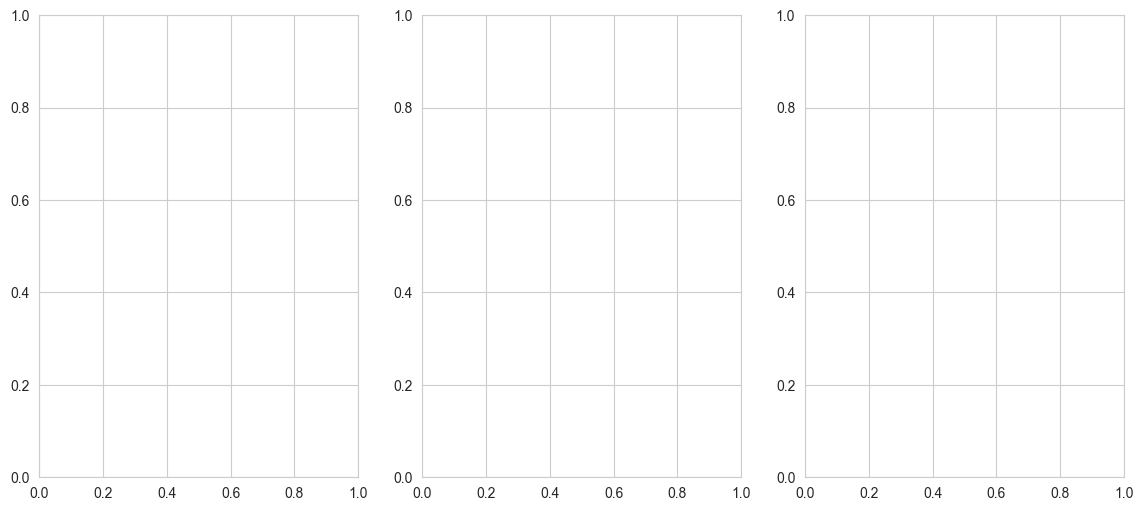

In [9]:
fig, ax = plt.subplots(1,3,figsize=(14,6))
E.query('E_diff < 0.1').E_diff.hist(ax = ax[0], bins=100, label = 'diff', color='red')
E.E_dft.hist(ax = ax[1], bins=100, label = 'dft', color='green')
E.E_dft.hist(ax = ax[2], bins=100, label = 'dft', color='green',alpha=0.5) 
E.E_ann.hist(ax = ax[2], bins=100, label = 'ann',alpha=0.5,color='purple')
#threshold = 0.3
#ax.axhline(y=threshold, color = 'red', label = 'E de corte')
#ax.axhline(y=-threshold, color = 'red', label = 'E de corte')
#ax.axvline(x = 11399, color = 'green', linestyle='--', label = 'Inicio Guillermo')
#ax.axvline(x = 26216, color = 'purple', linestyle='--', label = 'ultimo entrenamiento')
#ax.set_ylabel('Diferencia de E [eV]')
#ax.set_xlabel('configuracion')
fig.suptitle('Diferencia de energias DFT - ANN')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

Text(0.5, 0.98, 'Histograma de errores para la red inicial')

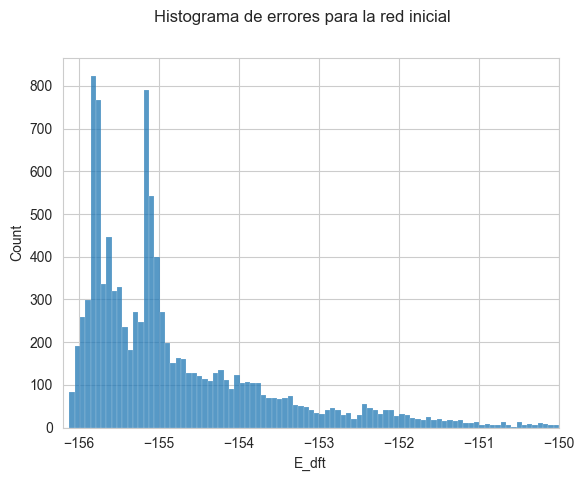

In [ ]:
NNini['E']['diff_ref'] = NNini['E']['E_diff'] + E_ref_ini
fig, ax = plt.subplots()
#ax2 = ax.twiny()
sns.histplot(data=NNini['E'], x='E_dft', ax=ax, bins=300)
#E.E_diff.hist(ax = ax2, bins=100, label = 'diff', color='red')
ax.set_xlim(-156.2,-150)
fig.suptitle('Histograma de errores para la red inicial')


Text(0, 0.5, 'Proporción de configuraciones')

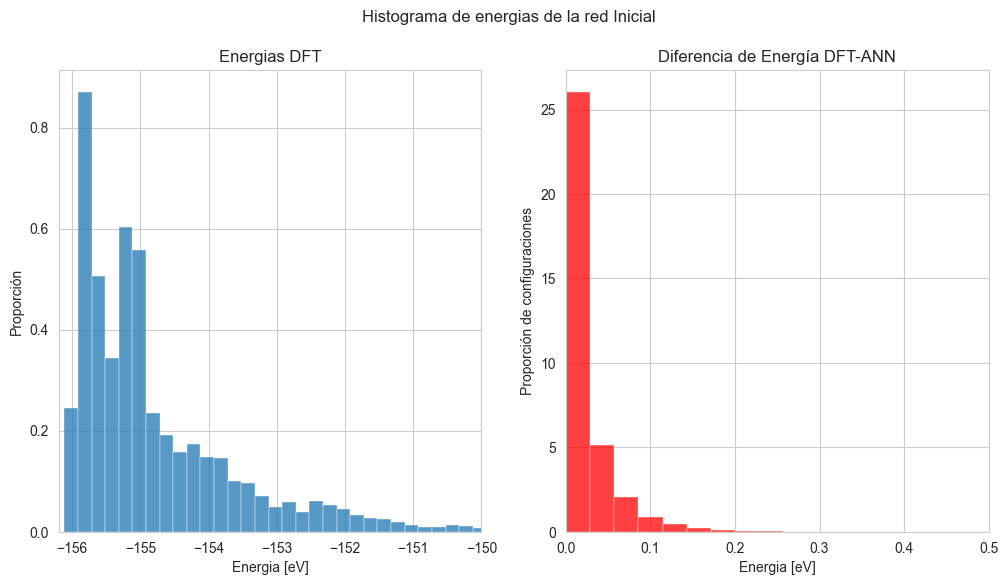

In [ ]:
NNini['E']['diff_ref'] = NNini['E']['E_diff'] + E_ref_15
fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=False)

sns.histplot(data=NNini['E'], x='E_dft', ax=ax[0], bins=100, stat="density")
sns.histplot(data=NNini['E'], x='E_diff', ax=ax[1], bins=100, color='red',stat="density")
ax[0].set_xlim(-156.2,-150)
ax[1].set_xlim(0,0.5)
fig.suptitle('Histograma de energias de la red Inicial')
ax[0].set_title('Energias DFT')
ax[0].set_xlabel('Energia [eV]')
ax[0].set_ylabel('Proporción')
ax[1].set_title('Diferencia de Energía DFT-ANN')
ax[1].set_xlabel('Energia [eV]')
ax[1].set_ylabel('Proporción de configuraciones')

Text(0, 0.5, 'Proporción de configuraciones')

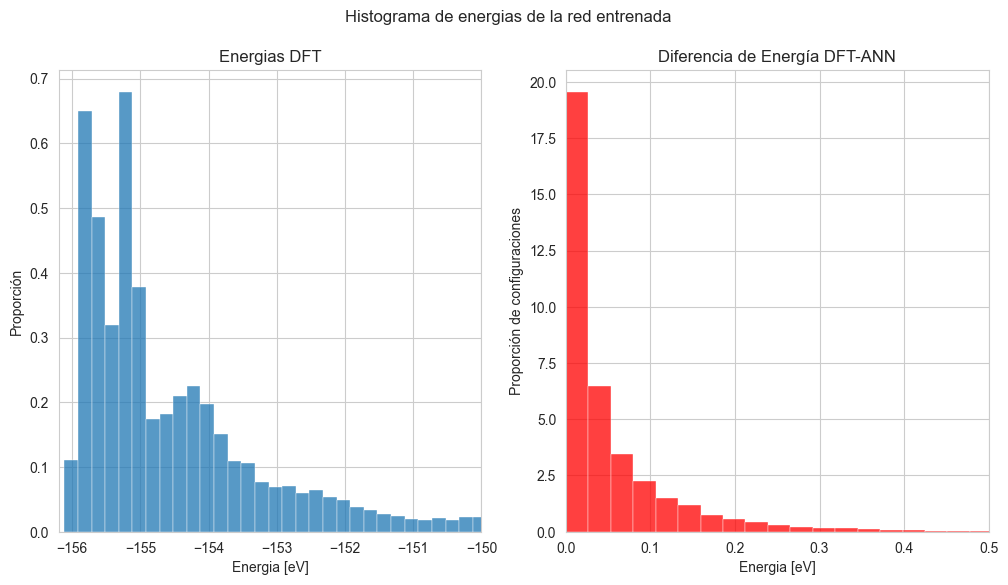

In [ ]:
NN15['E']['diff_ref'] = NN15['E']['E_diff'] + E_ref_15
fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=False)

sns.histplot(data=NN15['E'], x='E_dft', ax=ax[0], bins=100, stat="density")
sns.histplot(data=NN15['E'], x='E_diff', ax=ax[1], bins=100, color='red',stat="density")
ax[0].set_xlim(-156.2,-150)
ax[1].set_xlim(0,0.5)
fig.suptitle('Histograma de energias de la red entrenada')
ax[0].set_title('Energias DFT')
ax[0].set_xlabel('Energia [eV]')
ax[0].set_ylabel('Proporción')
ax[1].set_title('Diferencia de Energía DFT-ANN')
ax[1].set_xlabel('Energia [eV]')
ax[1].set_ylabel('Proporción de configuraciones')

Text(0, 0.5, 'Proporción de configuraciones')

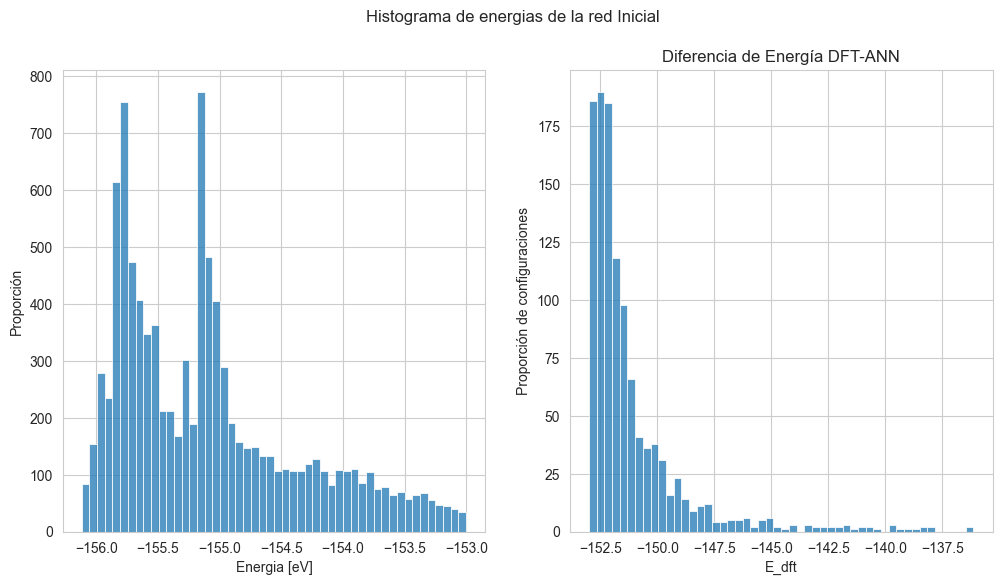

In [ ]:
NNini['E']['diff_ref'] = NNini['E']['E_diff'] + E_ref_15
fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=False)

sns.histplot(data=NNini['E'].query("E_dft < -153"), x='E_dft', ax=ax[0], bins=50)
sns.histplot(data=NNini['E'].query("E_dft > -153"), x='E_dft', ax=ax[1], bins=50)

fig.suptitle('Histograma de energias de la red Inicial')
ax[0].set_xlabel('Energia [eV]')
ax[0].set_ylabel('Proporción')
ax[1].set_title('Diferencia de Energía DFT-ANN')
ax[1].set_ylabel('Proporción de configuraciones')

Text(0, 0.5, 'Proporción de configuraciones')

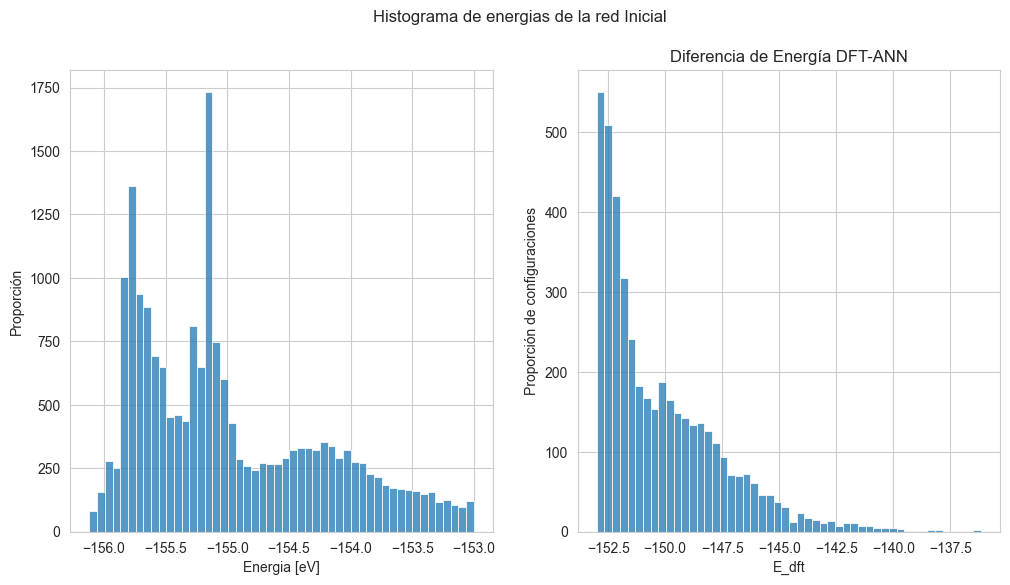

In [ ]:
NN15['E']['diff_ref'] = NN15['E']['E_diff'] + E_ref_15
fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=False)

sns.histplot(data=NN15['E'].query("E_dft < -153"), x='E_dft', ax=ax[0], bins=50)
sns.histplot(data=NN15['E'].query("E_dft > -153"), x='E_dft', ax=ax[1], bins=50)

fig.suptitle('Histograma de energias de la red Inicial')
ax[0].set_xlabel('Energia [eV]')
ax[0].set_ylabel('Proporción')
ax[1].set_title('Diferencia de Energía DFT-ANN')
ax[1].set_ylabel('Proporción de configuraciones')

Text(0.5, 1.0, 'Configuraciones de la red entrenada')

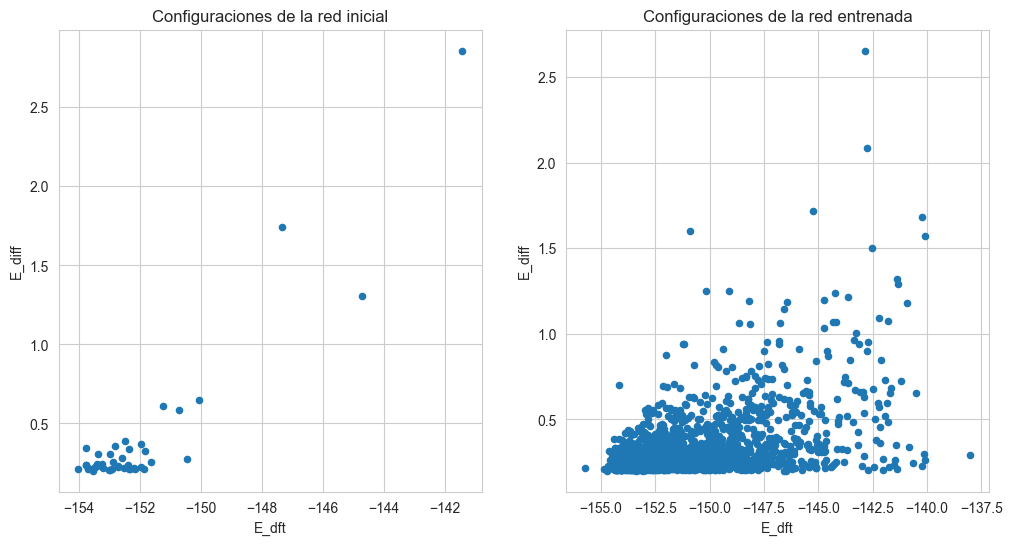

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
threshold=0.2
(
    NNini['E']
    .query("E_diff > @threshold")
    .sort_values('E_diff')
    .plot(kind='scatter', x='E_dft',y='E_diff',ax=ax[0])
)
ax[0].set_title('Configuraciones de la red inicial')
(
    NN15['E']
    .query("E_diff > @threshold")
    .sort_values('E_diff')
    .plot(kind='scatter', x='E_dft',y='E_diff',ax=ax[1])
)
ax[1].set_title('Configuraciones de la red entrenada')

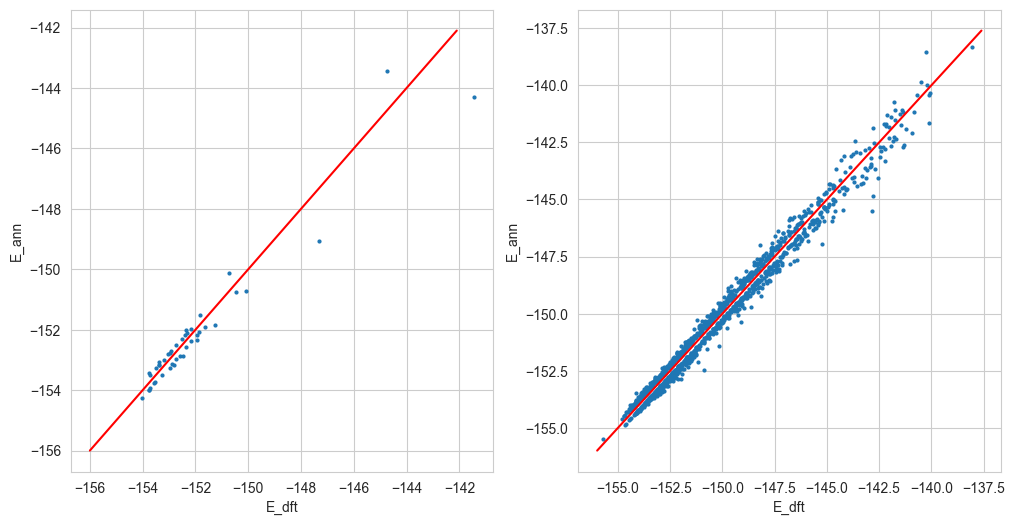

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

x = np.arange(-156,-142,0.1)
x2 = np.arange(-156,-137.5,0.1)
ax[0].plot(x,x, c='r')
ax[1].plot(x2,x2, c='r')

NNini['E'].query("E_diff > @threshold").reset_index(drop=False).plot('E_dft','E_ann', kind = 'scatter', ax = ax[0], s=4)
NN15['E'].query("E_diff > @threshold").reset_index(drop=False).plot('E_dft','E_ann', kind = 'scatter', ax = ax[1], s=4)

plt.show()

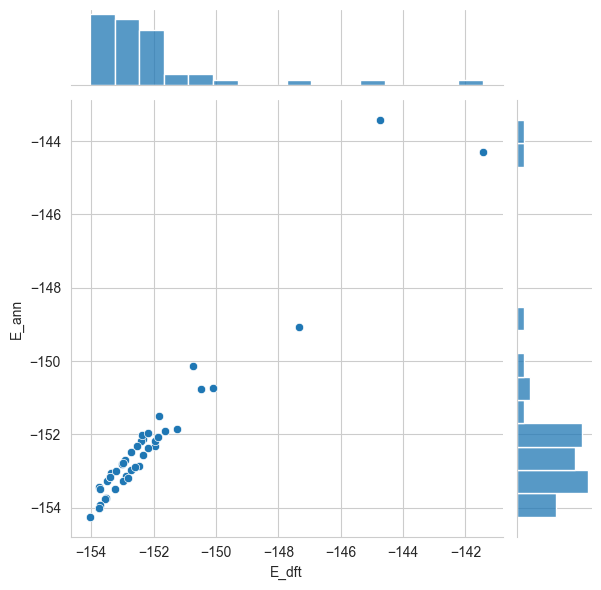

In [ ]:
sns.jointplot(data=NNini['E'].query("E_diff > @threshold").reset_index(drop=False), x='E_dft', y='E_ann')

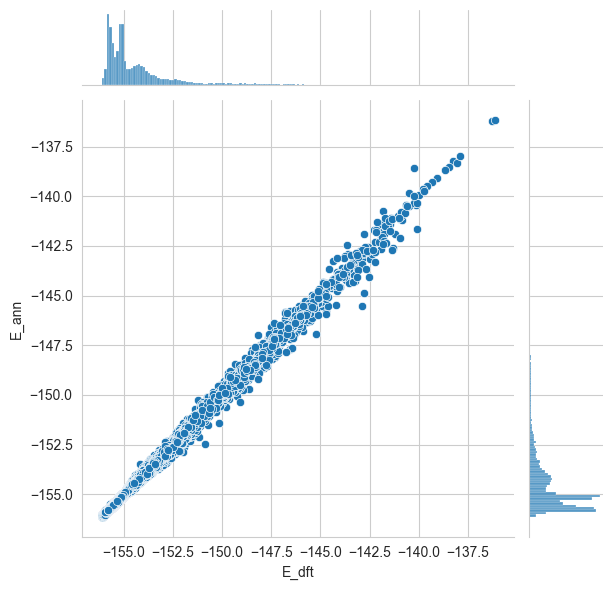

In [ ]:
sns.jointplot(data=NN15['E'], x='E_dft', y='E_ann')

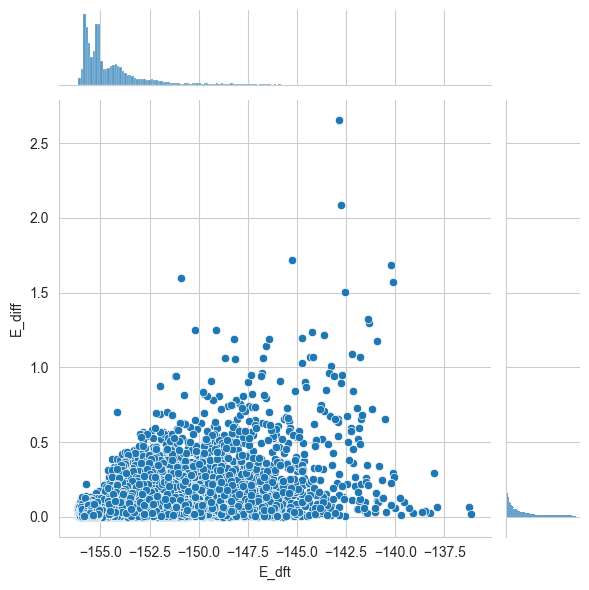

In [ ]:
sns.jointplot(data=NN15['E'],  x='E_dft',y='E_diff')

In [ ]:
(
    E
    .query("E_diff <= @threshold")
    .E_diff
    .round(1)
    .value_counts()
)

E_diff
0.0    9414
0.1    1340
0.2      72
Name: count, dtype: int64

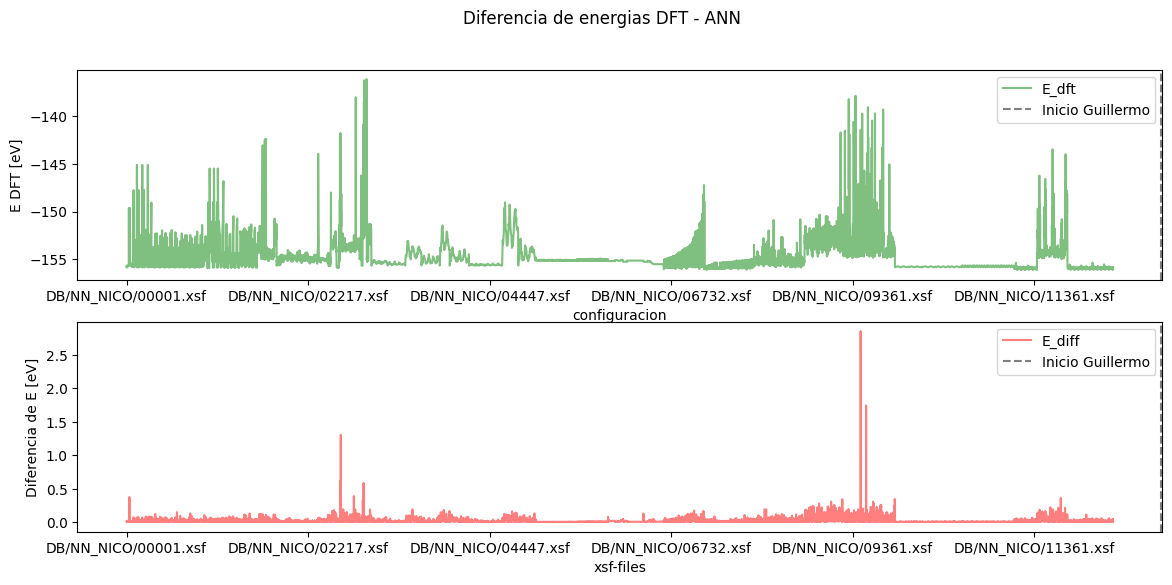

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(14,6))
E.E_dft.plot(ax = ax[0], color = 'green', alpha = 0.5)
ax[0].axvline(x = 11399, color = 'black', linestyle='--', label = 'Inicio Guillermo', alpha = 0.5)
#ax1 = ax.twinx()
ax[0].set_xlabel('configuracion')
ax[0].set_ylabel('E DFT [eV]')

E.E_diff.plot(ax = ax[1], color = 'red', alpha = 0.5)
ax[1].axvline(x = 11399, color = 'black', linestyle='--', label = 'Inicio Guillermo', alpha = 0.5)
ax[1].set_ylabel('Diferencia de E [eV]')
fig.suptitle('Diferencia de energias DFT - ANN')
ax[0].legend()
ax[1].legend()

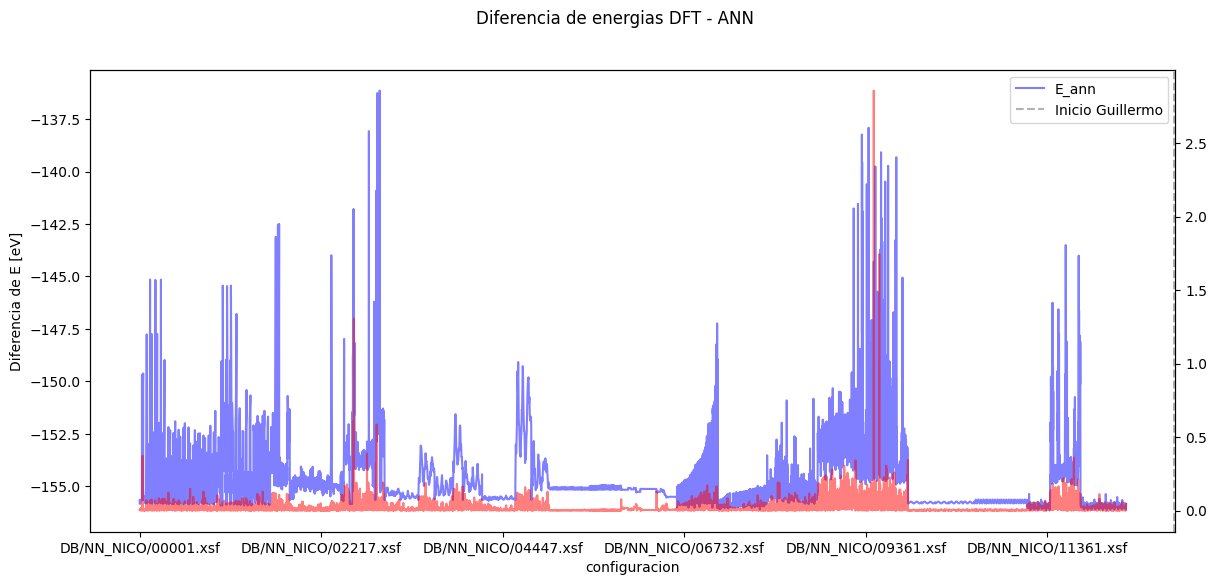

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
E.E_ann.plot(ax = ax, color = 'blue', alpha = 0.5)
ax1 = ax.twinx()
E.E_diff.plot(ax = ax1, color = 'red', alpha = 0.5)

ax.axvline(x = 11399, color = 'black', linestyle='--', label = 'Inicio Guillermo', alpha = 0.3)
ax.set_ylabel('Diferencia de E [eV]')
ax.set_xlabel('configuracion')
fig.suptitle('Diferencia de energias DFT - ANN')
ax.legend()

In [ ]:
E['E_diff'].max()

2.856400000000008

In [ ]:
# plt.scatter( x=E['xsf'], y=E['E_dft'], alpha=0.5, s=4, label='Configuraciones')
# plt.axvline(x = 12229, color = 'red', linestyle='--', label = 'Inicio', alpha = 0.5)
# plt.legend()
# plt.show()

E_NICO

In [ ]:
# E_NICO = E.query('xsf < 12229')
# E_NICO.E_dft.max()

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter( x=E_NICO['xsf'], y=E_NICO['E_dft'], alpha=0.5, s=2, label='Configuraciones', color='black')
plt.axhline(y=-155.82150402, color = 'red', linestyle='--', label = 'Energía de referencia', alpha = 0.4)
plt.axhline(y=-136.1472, color = 'green', linestyle='--', label = 'Energía máxima', alpha = 0.4)
plt.xlabel('Número de Configuración')
plt.ylabel(f'Energía [eV]')
plt.title('Distribución de Energias: Base de datos inicial')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('../Resultados/Red de Nicolas/DB_nico.png', dpi=1200)
plt.show()

NameError: name 'E_NICO' is not defined

<Figure size 900x600 with 0 Axes>

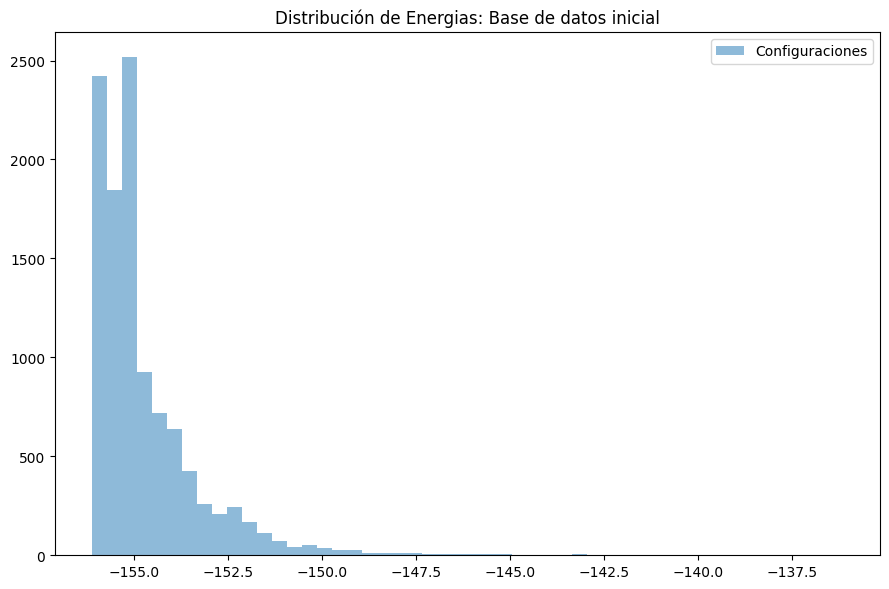

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(E['E_dft'], alpha=0.5,label='Configuraciones',bins=50)
#plt.axhline(y=-155.82150402, color = 'red', linestyle='--', label = 'Energía de referencia', alpha = 0.4)
#plt.axhline(y=-136.1472, color = 'green', linestyle='--', label = 'Energía máxima', alpha = 0.4)
#plt.xlabel('Número de Configuración')
#plt.ylabel(f'Energía [eV]')
plt.title('Distribución de Energias: Base de datos inicial')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
#plt.savefig('../Resultados/Red de Nicolas/DB_nico.png', dpi=1200)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


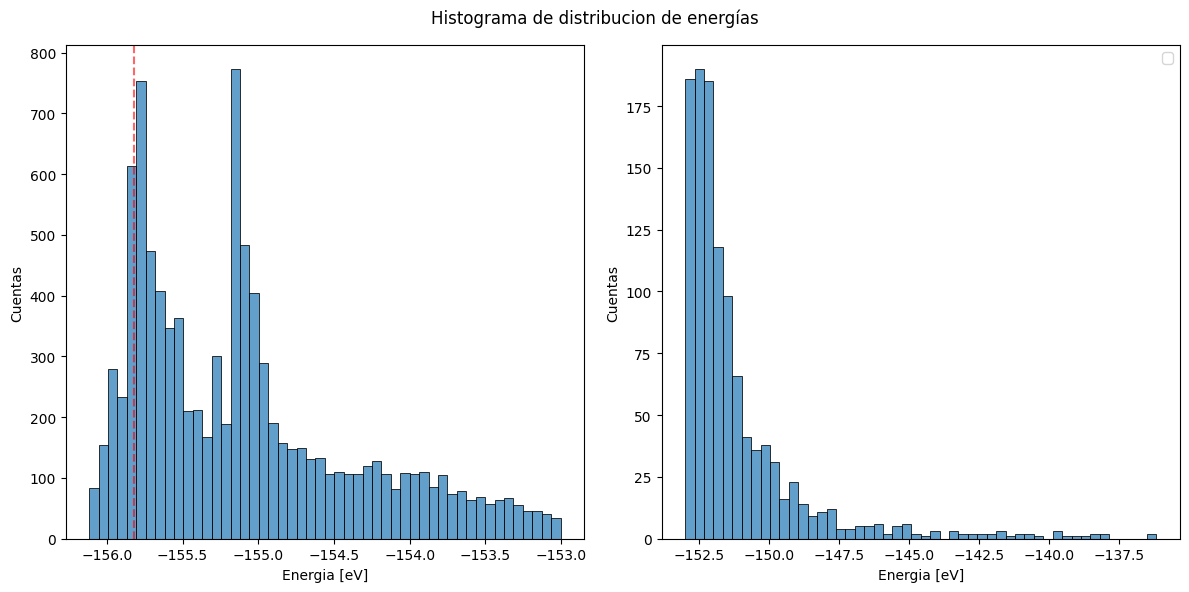

In [ ]:
E_low = E.query(' E_dft < -153')
E_high = E.query('E_dft > -153')


fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(E_low['E_dft'], bins=50, ax=ax[0], alpha=0.7)
sns.histplot(E_high['E_dft'], bins=50, ax=ax[1], alpha=0.7)
ax[0].axvline(x=-155.82150402, color = 'red', linestyle='--', alpha=0.6, label = 'Energia de referencia')
ax[0].set_ylabel('Cuentas')
ax[1].set_ylabel('Cuentas')
ax[0].set_xlabel('Energia [eV]')
ax[1].set_xlabel('Energia [eV]')
plt.suptitle('Histograma de distribucion de energías')
plt.tight_layout()
plt.legend()
plt.savefig('DB_nico_hist_energias.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


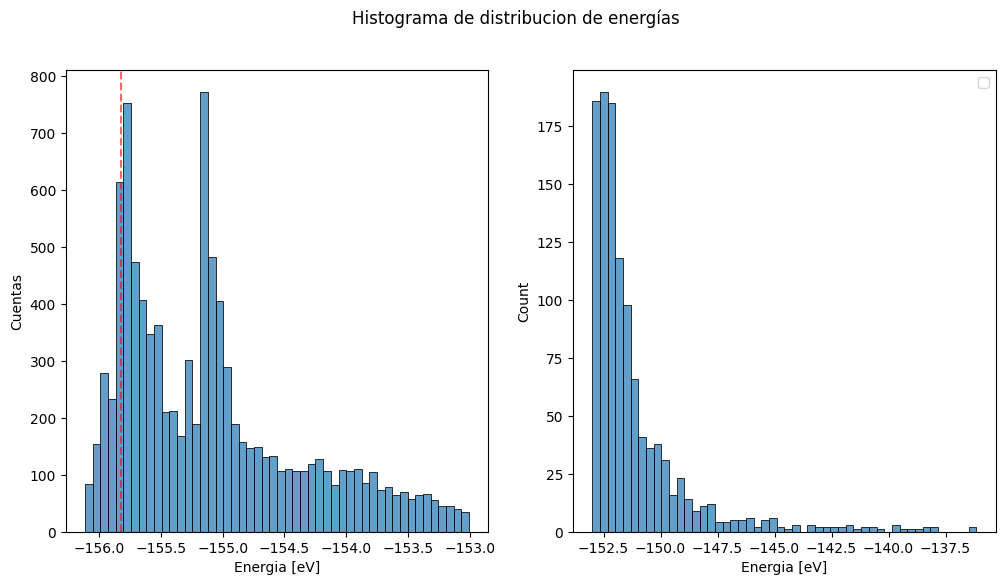

In [ ]:
E_low = E.query(' E_dft < -153')
E_high = E.query('E_dft > -153')

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(E_low['E_dft'], bins=50, ax=ax[0], alpha=0.7)
sns.histplot(E_high['E_dft'], bins=50, ax=ax[1], alpha=0.7)
ax[0].axvline(x=-155.82150402, color = 'red', linestyle='--', alpha=0.6)
ax[0].set_ylabel('Cuentas')
ax[0].set_xlabel('Energia [eV]')
ax[1].set_xlabel('Energia [eV]')
plt.suptitle('Histograma de distribucion de energías')
plt.legend()
plt.show()

In [ ]:
NNini['train']['E_dft'] = NNini['train']['E_dft'] - E_ref_dft
NNini['test']['E_dft']  = NNini['test']['E_dft']  - E_ref_dft
NNini['train']['E_ann'] = NNini['train']['E_ann'] - E_ref_ini
NNini['test']['E_ann']  = NNini['test']['E_ann']  - E_ref_ini

NN15['train']['E_dft'] = NN15['train']['E_dft'] - E_ref_dft
NN15['test']['E_dft']  = NN15['test']['E_dft']  - E_ref_dft
NN15['train']['E_ann'] = NN15['train']['E_ann'] - E_ref_15
NN15['test']['E_ann']  = NN15['test']['E_ann']  - E_ref_15

C:\Users\guill\AppData\Local\Temp\ipykernel_20340\2862304164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NNini['train']['E_dft'] = NNini['train']['E_dft'] - E_ref_dft
C:\Users\guill\AppData\Local\Temp\ipykernel_20340\2862304164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NNini['test']['E_dft']  = NNini['test']['E_dft']  - E_ref_dft
C:\Users\guill\AppData\Local\Temp\ipykernel_20340\2862304164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

Text(0, 0.5, 'Energía ANN [eV]')

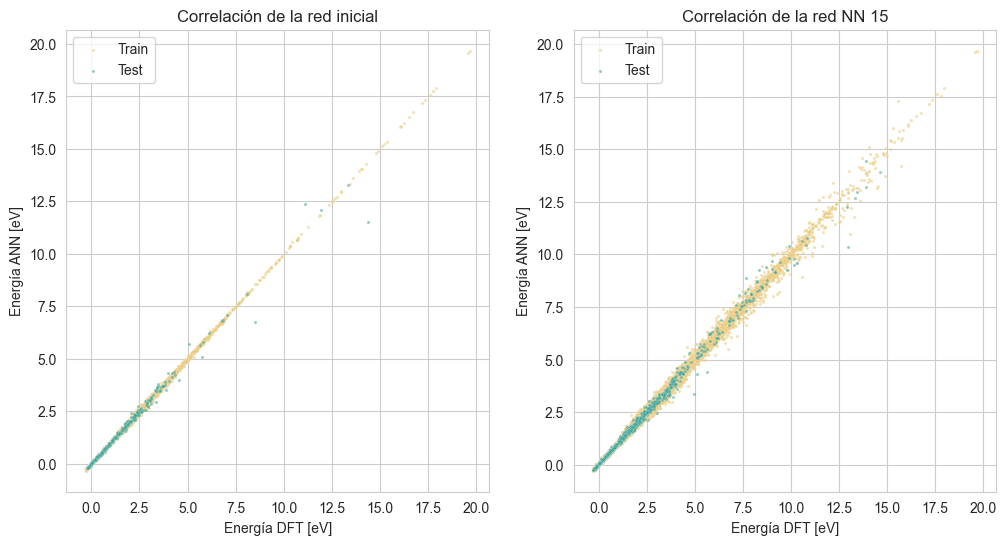

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=NNini['train'], x='E_dft', y='E_ann', ax=ax[0], color ='#e9c46a', label = 'Train',s=5, alpha = 0.5)
sns.scatterplot(data=NNini['test'], x='E_dft', y='E_ann', ax=ax[0], color ='#2a9d8f', label = 'Test',s=5, alpha = 0.5)
sns.scatterplot(data=NN15['train'], x='E_dft', y='E_ann', ax=ax[1], color ='#e9c46a', label = 'Train',s=5, alpha = 0.5)
sns.scatterplot(data=NN15['test'], x='E_dft', y='E_ann' , ax=ax[1], color ='#2a9d8f', label = 'Test',s=5, alpha = 0.5)
ax[0].set_title('Correlación de la red inicial')
ax[1].set_title('Correlación de la red NN 15')

ax[0].set_xlabel('Energía DFT [eV]')
ax[0].set_ylabel('Energía ANN [eV]')

ax[1].set_xlabel('Energía DFT [eV]')
ax[1].set_ylabel('Energía ANN [eV]')



# Analisis de datos

In [ ]:
ax = plt.subplot(111)
plt.title(Title + ' Correlation')
plt.xlabel('Energia DFT [eV]')
plt.ylabel('Energia ANN [eV]')
plt.axis('equal')
plt.scatter(enertrain[0],enertrain[1], color ='#e9c46a', label = 'Trainset',s=5, alpha = 0.3)
plt.scatter(enertest[0],enertest[1],color = '#2a9d8f', label = 'Testset',s=5, alpha = 0.3)
#sns.histplot(data=enertrain, x=1, bins=20)
X = np.arange(-1,20,0.25)
plt.plot(X,X, color = '#e76f51',linewidth=0.5, alpha =0.9)
plt.xlim(-0.3,20)
plt.ylim(-0.3,20)
plt.legend(loc = 'upper left')
plt.grid()
plt.tight_layout()
#plt.savefig(path+run+'energyCorrelation'+Title+'.png')

,E_dft,E_ann,xsf-files
0,-152.9880,-153.0596,DB/NN_NICO/00281.xsf
1,-155.4550,-155.4636,DB/NN_NICO/00418.xsf
2,-155.6929,-155.6643,DB/NN_NICO/00562.xsf
3,-155.3683,-155.3586,DB/NN_NICO/00701.xsf
4,-155.7315,-155.7055,DB/NN_NICO/00840.xsf
...,...,...,...
10322,-154.6211,-154.6340,DB/NN_NICO/11697.xsf
10323,-155.8560,-155.8458,DB/NN_NICO/11825.xsf
10324,-155.8785,-155.8686,DB/NN_NICO/11953.xsf
10325,-155.9107,-155.9003,DB/NN_NICO/12081.xsf
